In [2]:
%pylab inline
root_dir = '/mnt/store1/oliverphilcox/CMU/QPM for Oliver/QPM_Pairs_Ross/'
root_dir_m = '/mnt/store1/oliverphilcox/CMU/QPM for Oliver/QPM_Pairs_Mariana/'

Populating the interactive namespace from numpy and matplotlib


In [3]:
def compute_xi_Ross(mock_no):
    ratio_gal_rand = float(np.genfromtxt(root_dir+'xyz%d_real.txt.pairs'%mock_no,max_rows=1))
    pairs_data = np.loadtxt(root_dir+'xyz%d_real.txt.pairs'%mock_no,skiprows=1)
    r_all = pairs_data[:,0]
    mu_all = pairs_data[:,1]
    r_bins = np.unique(r_all)
    mu_bins = np.unique(mu_all)
    DD_data = pairs_data[:,2].reshape(len(r_bins),len(mu_bins))
    DR_data = pairs_data[:,3].reshape(len(r_bins),len(mu_bins))*ratio_gal_rand/2. # from different normalization
    RR_data = pairs_data[:,4].reshape(len(r_bins),len(mu_bins))*ratio_gal_rand**2.
    xi_est = (DD_data-2.*DR_data+RR_data)/RR_data
    
    return r_bins,mu_bins,xi_est

In [4]:
# Mock independent quantities:
mfile_RR = root_dir_m+'qpm-unrecon-0001-RR.dat'
all_RR_data_M = np.loadtxt(mfile_RR,skiprows=2)
r_bins_tmp = np.genfromtxt(mfile_RR,max_rows=1)
r_bins_m = (r_bins_tmp[:-1]+r_bins_tmp[1:])/2.
mu_bins_tmp = np.genfromtxt(mfile_RR,max_rows=1,skip_header=1)
mu_bins_m = (mu_bins_tmp[:-1]+mu_bins_tmp[1:])/2.

In [5]:
def compute_xi_Mariana(mock_no):
    mfile_norms = root_dir_m+'qpm-unrecon-%s-norm.dat'%str(mock_no).zfill(4)
    norms_M = np.loadtxt(mfile_norms,usecols=1)
    factor = norms_M[0]/norms_M[1]

    mfile_DD = root_dir_m+'qpm-unrecon-%s-DD.dat'%str(mock_no).zfill(4)
    mfile_DR = root_dir_m+'qpm-unrecon-%s-DR.dat'%str(mock_no).zfill(4)
    DD_data_M = np.loadtxt(mfile_DD,skiprows=2)
    DR_data_M = np.loadtxt(mfile_DR,skiprows=2)*factor
    RR_data_M = all_RR_data_M*factor**2.

    xi_est_M = (DD_data_M-2.*DR_data_M+RR_data_M)/RR_data_M
    
    return r_bins_m,mu_bins_m,xi_est_M

Compute mean xi:

In [5]:
xi_R=[];xi_M=[]
for i in range(1,100):
    r_bins,mu_bins,xi_tmp=compute_xi_Ross(i)
    r_bins_m,mu_bins_m,xi_tmp_M = compute_xi_Mariana(i)
    xi_R.append(xi_tmp)
    xi_M.append(xi_tmp_M)
xi_R_mean = np.mean(np.asarray(xi_R),axis=0)
xi_M_mean = np.mean(np.asarray(xi_M),axis=0)

In [6]:
r_bins,mu_bins,xi_est=compute_xi_Ross(57)
r_bins_m,mu_bins_m,xi_est_M=compute_xi_Mariana(57)

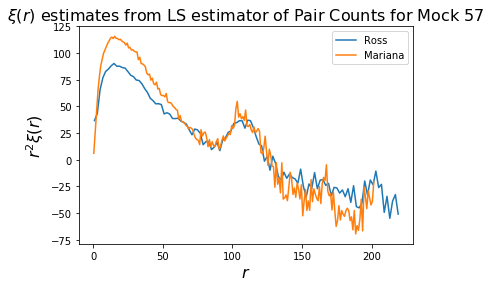

In [7]:
plt.plot(r_bins,xi_est.mean(axis=1)*r_bins*r_bins,label='Ross')
plt.plot(r_bins_m,xi_est_M.mean(axis=1)*r_bins_m*r_bins_m,label='Mariana')
plt.ylabel(r'$r^2\xi(r)$',fontsize=16);
plt.xlabel(r'$r$',fontsize=16);plt.title(r'$\xi(r)$ estimates from LS estimator of Pair Counts for Mock 57',fontsize=16);
plt.legend();

Find actual mean:

In [8]:
xi_mock_mean=np.genfromtxt("../../xi_functions/QPM_Mean_xi.txt",skip_header=2)
mean_r = np.genfromtxt("../../xi_functions/QPM_Mean_xi.txt",max_rows=1)
mean_mu = np.genfromtxt('../../xi_functions/QPM_Mean_xi.txt',skip_header=1,max_rows=1)

In [9]:
QPM_mash_xi = np.genfromtxt('../../xi_functions/QPM_Mash.xi',skip_header=2)
QPM_mash_r = np.genfromtxt('../../xi_functions/QPM_Mash.xi',max_rows=1)

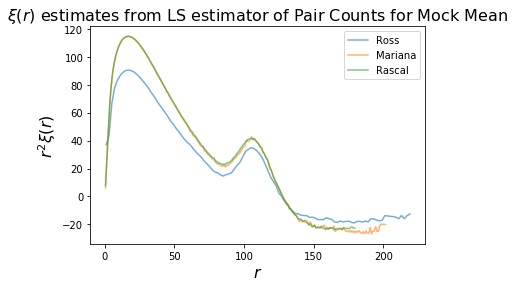

In [10]:
plt.plot(r_bins,xi_R_mean.mean(axis=1)*r_bins*r_bins,label='Ross',alpha=0.6)
plt.plot(r_bins_m,xi_M_mean.mean(axis=1)*r_bins_m*r_bins_m,label='Mariana',alpha=0.6)
plt.plot(mean_r,xi_mock_mean.mean(axis=1)*mean_r**2.,label='Rascal',alpha=0.6)
plt.ylabel(r'$r^2\xi(r)$',fontsize=16);
plt.xlabel(r'$r$',fontsize=16);plt.title(r'$\xi(r)$ estimates from LS estimator of Pair Counts for Mock Mean',fontsize=16);
plt.legend();

Now save the computed correlation functions from the Mariana pair counts to file:

In [28]:
for mock_no in range(1,100):
    outdir='/mnt/store1/oliverphilcox/CMU/xi_functions_QPM/'
    import os
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    with open(outdir+'QPM_Mariana_mock_%d.xi'%mock_no,"w") as outfile:
        for i in range(len(r_bins_m)):
            outfile.write("%.8e "%r_bins_m[i])
        outfile.write("\n")
        for j in range(len(mu_bins_m)):
            outfile.write("%.8e "%mu_bins_m[j])
        outfile.write("\n")
        for i in range(len(r_bins_m)):
            for j in range(len(mu_bins_m)):
                outfile.write("%.8e "%xi_M[mock_no-1][i][j])
            outfile.write("\n")

Also save mean of these mocks:

In [30]:
outdir='/mnt/store1/oliverphilcox/CMU/xi_functions_QPM/'
with open(outdir+'QPM_Mariana_mean.xi',"w") as outfile:
    for i in range(len(r_bins_m)):
        outfile.write("%.8e "%r_bins_m[i])
    outfile.write("\n")
    for j in range(len(mu_bins_m)):
        outfile.write("%.8e "%mu_bins_m[j])
    outfile.write("\n")
    for i in range(len(r_bins_m)):
        for j in range(len(mu_bins_m)):
            outfile.write("%.8e "%xi_M_mean[i][j])
        outfile.write("\n")

In [14]:
tmp_xi = np.genfromtxt("/mnt/store1/oliverphilcox/CMU/xi_functions_QPM/QPM_Mariana_mock_5.xi",skip_header=2)
tmp_xi2 = np.genfromtxt("/mnt/store1/oliverphilcox/CMU/xi_functions_QPM/QPM_Mariana_mock_3.xi",skip_header=2)


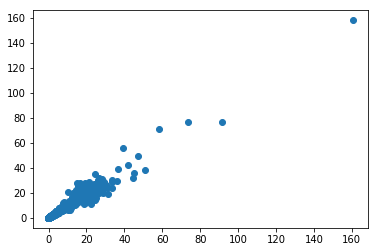

In [17]:
plt.scatter(tmp_xi.ravel(),tmp_xi2.ravel())

In [11]:
factors=[]
for i in range(1,100):
    mfile_norms = root_dir_m+'qpm-unrecon-%s-norm.dat'%str(i).zfill(4)
    norms_M = np.loadtxt(mfile_norms,usecols=1)
    factor = norms_M[0]/norms_M[1]
    factors.append(factor)

In [15]:
np.mean(factors)*6.5e6
np.std(factors)*6.5e6

1544.826783225327

Comparison with self-computed DD:

In [407]:
DD_corrfunc = np.genfromtxt("/mnt/store1/oliverphilcox/CMU/QPM_DD1/DD_n36_m10.dat").reshape(36,10)

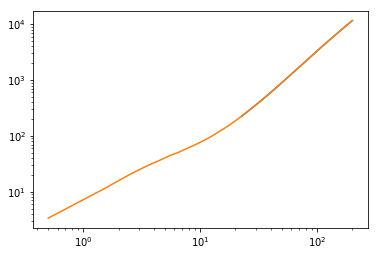

In [427]:
r_bins_all = np.loadtxt('../../python/binfile_linear.csv')
r_bins_corrfunc = np.mean(r_bins_all,axis=1)
plt.plot(r_bins_corrfunc,DD_corrfunc.mean(axis=1)/70.)
plt.plot(r_bins_m,DD_data_M.mean(axis=1));
plt.xscale('log');plt.yscale('log');

In [416]:
norms_M

array([ 100517.66300002, 2021415.16049598])

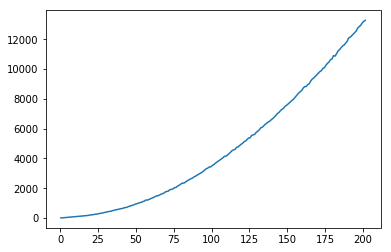

In [382]:
plt.plot(r_bins_m,DD_data_M[:,0])

In [378]:
mock_no=1
ratio_gal_rand = float(np.genfromtxt(root_dir+'xyz%d_real.txt.pairs'%mock_no,max_rows=1))
pairs_data = np.loadtxt(root_dir+'xyz%d_real.txt.pairs'%mock_no,skiprows=1)
r_all = pairs_data[:,0]
mu_all = pairs_data[:,1]
r_bins = np.unique(r_all)
mu_bins = np.unique(mu_all)
DD_data = pairs_data[:,2].reshape(len(r_bins),len(mu_bins))
DR_data = pairs_data[:,3].reshape(len(r_bins),len(mu_bins))*ratio_gal_rand/2. # from different normalization
RR_data = pairs_data[:,4].reshape(len(r_bins),len(mu_bins))*ratio_gal_rand**2.
xi_est = (DD_data-2.*DR_data+RR_data)/RR_data

In [379]:
mfile_norms = root_dir_m+'qpm-unrecon-%s-norm.dat'%str(mock_no).zfill(4)
norms_M = np.loadtxt(mfile_norms,usecols=1)
factor = norms_M[0]/norms_M[1]

mfile_DD = root_dir_m+'qpm-unrecon-%s-DD.dat'%str(mock_no).zfill(4)
mfile_DR = root_dir_m+'qpm-unrecon-%s-DR.dat'%str(mock_no).zfill(4)
DD_data_M = np.loadtxt(mfile_DD,skiprows=2)
DR_data_M = np.loadtxt(mfile_DR,skiprows=2)*factor
RR_data_M = all_RR_data_M*factor**2.

xi_est_M = (DD_data_M-2.*DR_data_M+RR_data_M)/RR_data_M

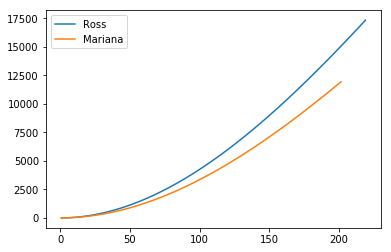

In [348]:
plt.plot(r_bins,DR_data.mean(axis=1),label='Ross')#*r_bins*r_bins)
plt.plot(r_bins_m,DR_data_M.mean(axis=1),label='Mariana')
plt.legend();

In [152]:
infile='/mnt/store1/oliverphilcox/CMU/QPM for Oliver/QPM_50X_Randoms/mock_random_DR12_CMASS_N_50x1.rdzw'
with open(infile,"r") as opener:
    for n,line in enumerate(opener):
        if n>10:
            break
        x=line

In [153]:
np.asarray(x.strip().split('  '),dtype=float)

array([230.3004  ,  32.875587,   0.433583,   0.299762])